## Preprocessing

In [1]:
# Import dependencies.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

#  Import and read `charity_data.csv`.
import pandas as pd 
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


###  Optimization 1
While `EIN` is unique for each application in the dataset, `NAME` is not, meaning that the same applicant can have multiple applications (and in some cases, hundreds of applications) in the dataset, which could have impact on the success of their ventures. As a result, the feature should not be simply dropped; instead, the number of applications associated with each applicant can be extracted as a separate feature to be used for the model implementation.

In [2]:
application_df['NAME'].value_counts()

PARENT BOOSTER USA INC                                                  1260
TOPS CLUB INC                                                            765
UNITED STATES BOWLING CONGRESS INC                                       700
WASHINGTON STATE UNIVERSITY                                              492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                          408
                                                                        ... 
ST LOUIS SLAM WOMENS FOOTBALL                                              1
AIESEC ALUMNI IBEROAMERICA CORP                                            1
WEALLBLEEDRED ORG INC                                                      1
AMERICAN SOCIETY FOR STANDARDS IN MEDIUMSHIP & PSYCHICAL INVESTIGATI       1
WATERHOUSE CHARITABLE TR                                                   1
Name: NAME, Length: 19568, dtype: int64

In [3]:
# Create a new feature called `APP_COUNT` to capture the number of applications associated with each applicant.
application_df['APP_COUNT'] = application_df.groupby('NAME')['NAME'].transform('count')

In [4]:
# 'EIN' and 'NAME' can now be dropped as before.
application_df.drop(columns=['EIN', 'NAME'], inplace=True)

In [5]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
APP_COUNT                   92
dtype: int64

In [6]:
# Look at `APPLICATION_TYPE` value counts for binning.
application_type_counts = application_df.APPLICATION_TYPE.value_counts()
application_type_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Choose a cutoff value and create a list of application types to be replaced.
# use the variable name `application_types_to_replace`.
application_types_to_replace = application_type_counts[application_type_counts<200].index

# Replace in the `application_df` dataframe.
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app, 'Other')

# Check to make sure binning was successful.
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [8]:
# Look at `CLASSIFICATION` value counts for binning.
classification_counts = application_df.CLASSIFICATION.value_counts()
classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [9]:
# Look at `CLASSIFICATION` value counts greater than 1.
classification_counts[classification_counts>1]

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64

### Optimization 2
Relax the lower cutoff value for `CLASSIFICATION` counts from 1000 to 100, in effect creating more bins and decreasing the number of values for the `Other` bin. Note that this in turn creates more input parameters for the first hidden layer of the NN model, which is taken into account for the third optimization option.

In [10]:
# Choose a cutoff value and create a list of classifications to be replaced.
# Use the variable name `classifications_to_replace`.
classifications_to_replace = classification_counts[classification_counts<100].index

# Replace in the `application_df` Dataframe.
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls, 'Other')
    
# Check to make sure binning is successful.
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
Other      669
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
Name: CLASSIFICATION, dtype: int64

In [11]:
# Convert categorical data to numeric with `pd.get_dummies`.
application_df = pd.get_dummies(application_df)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APP_COUNT,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,8,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0


In [12]:
# Split the preprocessed data into our features and target arrays.
y = application_df['IS_SUCCESSFUL']
X = application_df.drop(columns='IS_SUCCESSFUL')

# Split the preprocessed data into a training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [13]:
# Create a StandardScaler instance.
scaler = StandardScaler()

# Fit the StandardScaler instance.
X_scaler = scaler.fit(X_train)

# Scale the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

### Optimization 3
Adjust the number of nodes for the first and second layers in accordance with the increase in the input parameters (from 44 to 51). In addition, add a third hidden layer with fewer neurons than the second layer, following the common practice to form a pyramid with fewer and fewer neurons at each layer.

In [14]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X.columns)
hidden_nodes_layer1 = 100
hidden_nodes_layer2 = 50
hidden_nodes_layer3 = 25

nn = tf.keras.models.Sequential()

# Add first hidden layer.
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation='relu'))

# Add second hidden layer.
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation='relu'))

# Add third hidden layer.
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation='relu'))

# Add output layer.
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the model structure.
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               5100      
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 25)                1275      
                                                                 
 dense_3 (Dense)             (None, 1)                 26        
                                                                 
Total params: 11,451
Trainable params: 11,451
Non-trainable params: 0
_________________________________________________________________


In [15]:
# Compile the model.
nn.compile(loss='binary_crossentropy', 
           optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
           metrics=['accuracy'])

In [16]:
# Train the model.
iters = 50
fit_model = nn.fit(X_train_scaled, y_train, epochs=iters)

Epoch 1/50
804/804 [==============================] - 4s 3ms/step - loss: 0.5475 - accuracy: 0.7268
Epoch 2/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5178 - accuracy: 0.7462
Epoch 3/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5100 - accuracy: 0.7545
Epoch 4/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5033 - accuracy: 0.7548
Epoch 5/50
804/804 [==============================] - 2s 2ms/step - loss: 0.4992 - accuracy: 0.7561
Epoch 6/50
804/804 [==============================] - 2s 2ms/step - loss: 0.4953 - accuracy: 0.7568
Epoch 7/50
804/804 [==============================] - 1s 2ms/step - loss: 0.4934 - accuracy: 0.7586
Epoch 8/50
804/804 [==============================] - 1s 2ms/step - loss: 0.4918 - accuracy: 0.7587
Epoch 9/50
804/804 [==============================] - 1s 2ms/step - loss: 0.4905 - accuracy: 0.7601
Epoch 10/50
804/804 [==============================] - 1s 1ms/step - loss: 0.4886 - accuracy: 0.7605

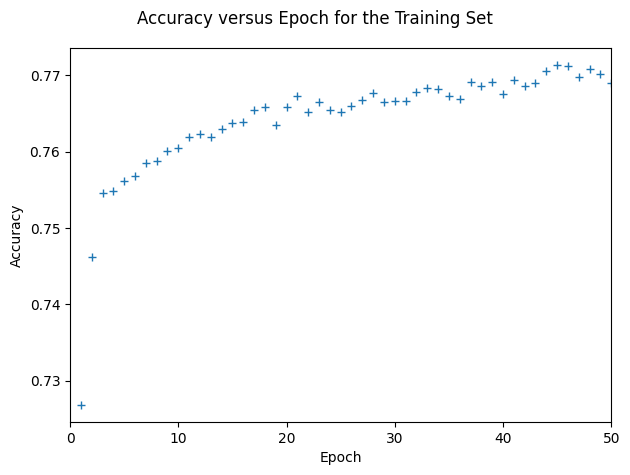

In [17]:
# Create a DataFrame containing training history.
history_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs.
history_df.index += 1

# Plot accuracy versus Epoch.
fig, ax = plt.subplots()
ax.plot(history_df['accuracy'], linestyle='None', marker='+')
ax.set(xlabel='Epoch', xlim=(0, iters),
       ylabel='Accuracy')
fig.suptitle('Accuracy versus Epoch for the Training Set')
fig.tight_layout()
fig.savefig('training_accuracy_vs_epoch.png', bbox_inches='tight')

In [18]:
# Evaluate the model using the test data.
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5197 - accuracy: 0.7542 - 352ms/epoch - 1ms/step
Loss: 0.5196691155433655, Accuracy: 0.7541691064834595


In [19]:
# Export the model in the HDF5 format.
nn.save('AlphabetSoupCharity_Optimization.h5')